In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from termcolor import colored

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

import warnings
warnings.filterwarnings("ignore")

print(colored('\nAll libraries imported succesfully.', 'blue'))


All libraries imported succesfully.


In [8]:
df = pd.read_csv('./Cardiovascular_Disease_Dataset/Cardiovascular_Disease_Dataset.csv')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   patientid          1000 non-null   int64  
 1   age                1000 non-null   int64  
 2   gender             1000 non-null   int64  
 3   chestpain          1000 non-null   int64  
 4   restingBP          1000 non-null   int64  
 5   serumcholestrol    1000 non-null   int64  
 6   fastingbloodsugar  1000 non-null   int64  
 7   restingrelectro    1000 non-null   int64  
 8   maxheartrate       1000 non-null   int64  
 9   exerciseangia      1000 non-null   int64  
 10  oldpeak            1000 non-null   float64
 11  slope              1000 non-null   int64  
 12  noofmajorvessels   1000 non-null   int64  
 13  target             1000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 109.5 KB


In [10]:
df.describe()     
# Pandas describe() is used to view some basic statistical details like percentile, mean, std, etc. of a data frame or a series of numeric values. 


# count: Total Number of Non-Empty values
# mean: Mean of the column values
# std: Standard Deviation of the column values
# min: Minimum value from the column
# 25%: 25 percentile
# 50%: 50 percentile
# 75%: 75 percentile
# max: Maximum value from the column

,patientid,age,gender,chestpain,restingBP,serumcholestrol,fastingbloodsugar,restingrelectro,maxheartrate,exerciseangia,oldpeak,slope,noofmajorvessels,target
count,1.000000e+03,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,5.048704e+06,49.24200,0.765000,0.980000,151.747000,311.447000,0.296000,0.748000,145.477000,0.498000,2.707700,1.540000,1.222000,0.580000
std,2.895905e+06,17.86473,0.424211,0.953157,29.965228,132.443801,0.456719,0.770123,34.190268,0.500246,1.720753,1.003697,0.977585,0.493805
min,1.033680e+05,20.00000,0.000000,0.000000,94.000000,0.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.536440e+06,34.00000,1.000000,0.000000,129.000000,235.750000,0.000000,0.000000,119.750000,0.000000,1.300000,1.000000,0.000000,0.000000
50%,4.952508e+06,49.00000,1.000000,1.000000,147.000000,318.000000,0.000000,1.000000,146.000000,0.000000,2.400000,2.000000,1.000000,1.000000
75%,7.681877e+06,64.25000,1.000000,2.000000,181.000000,404.250000,1.000000,1.000000,175.000000,1.000000,4.100000,2.000000,2.000000,1.000000
max,9.990855e+06,80.00000,1.000000,3.000000,200.000000,602.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [11]:
df.isna().sum()

# The isna() function returns a Boolean value of True if the value is NaN and False otherwise. The sum() function returns the sum of True values, which equals the number of NaN values in the column.

patientid            0
age                  0
gender               0
chestpain            0
restingBP            0
serumcholestrol      0
fastingbloodsugar    0
restingrelectro      0
maxheartrate         0
exerciseangia        0
oldpeak              0
slope                0
noofmajorvessels     0
target               0
dtype: int64

In [12]:
df.columns

# When called on a data frame using the syntax DataFrame.columns, it returns the names of the columns present in that data frame.

Index(['patientid', 'age', 'gender', 'chestpain', 'restingBP',
       'serumcholestrol', 'fastingbloodsugar', 'restingrelectro',
       'maxheartrate', 'exerciseangia', 'oldpeak', 'slope', 'noofmajorvessels',
       'target'],
      dtype='object')

💞 1.What is the age range of patients in the dataset?

Answer: Age Range: 20 - 80

Explanation: The age range is determined by finding the minimum and maximum age values in the dataset. In this case, patients' ages range from 20 to 80 years.

In [13]:
minimumAge = df['age'].min()
maximumAge = df['age'].max()

age_range = f'Age Range : {minimumAge} - {maximumAge}'
print(age_range)

Age Range : 20 - 80


💞 2. How many males and females are represented in the dataset?

Answer: Female: 1, Male: 0

Explanation: The dataset contains only female patients, as indicated by the 'gender' column where 1 represents female and 0 represents male.

In [14]:
gender_count = df['gender'].value_counts()
print(gender_count)

# here , 1 --> female , 0 --> male 

gender
1    765
0    235
Name: count, dtype: int64




💞 3. What is the most common type of chest pain observed in the patients?

Answer: Chest Pain Type 2

Explanation: Chest pain type 2 is the most common among the patients, as determined by counting the occurrences in the 'chestpain' column.

In [17]:
chest_pain_count = df['chestpain'].value_counts()
print(chest_pain_count)

chestpain
0    420
2    312
1    224
3     44
Name: count, dtype: int64


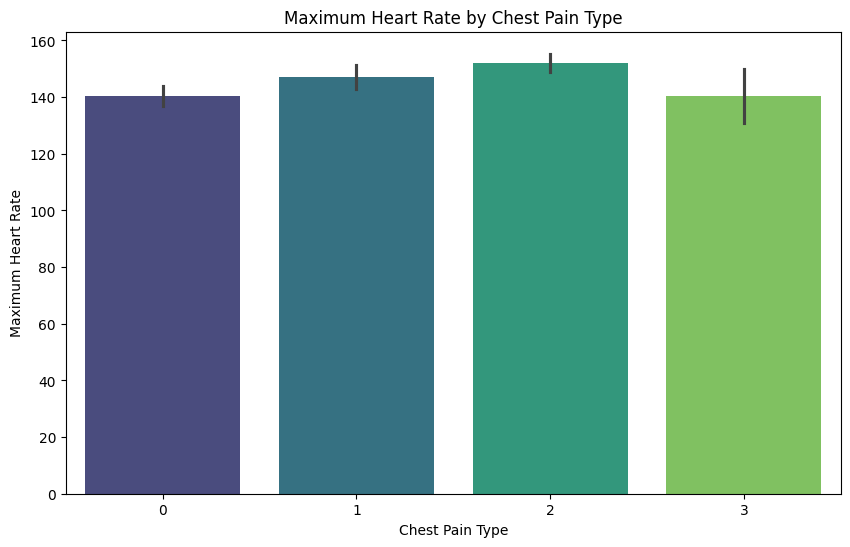

In [20]:
# visualization
plt.figure(figsize=(10,6))
sns.barplot(x= 'chestpain', y= 'maxheartrate', data = df , palette = 'viridis')
plt.title('Maximum Heart Rate by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Maximum Heart Rate')
plt.show()